<a href="https://colab.research.google.com/github/andreywhite01/TSP-IDZ-1/blob/main/%D0%A2%D0%A1%D0%9F_%D0%98%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 6
---



---

#Задание 1
---
Фермер собирает в год x тонн пшеницы, которую продает на свободном рынке. Сразу после продажи все вырученные средства он готов потратить на погашение кредита в y млн. руб. Текущая цена тонны пшеницы составляет z тыс. руб. За три месяца до сбора урожая фермер решает застраховаться от возможного резкого изменения цен на пшеницу, потому что ему важно погасить кредит именно в текущем году. Что вы ему посоветуете (аргументируйте расчетами) сделать сейчас?
* Купить фьючерс на всю величину урожая x по цене z со сроком исполнения три месяца;
* продать фьючерс на всю величину урожая x по цене z со сроком исполнения три месяца;
* купить опцион покупателя на всю величину урожая x по цене исполнения E тыс. руб. за тонну;
* продать опцион продавца на всю величину урожая x по цене исполнения E тыс. руб. за тонну.


---

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
x = 1500 # Тонны пшеницы в год
y = 5e6 # Кредит млн. руб
z = 3e3 # Текущая цена тонны пшеницы в руб
E = 2700 # Цена исполнения руб.
T = 3 / 12. # Время до завершения контракта

In [3]:
sigma = 0.3 # Волатильность
r = 0.12 # Процентная ставка по кредиту
r0 = 0.06 # Безрисковая процентная ставка

In [4]:
def BlackShowlsCall(t, T, E, S, r, sigma):
  d1 = (np.log(S / E) + (r + (sigma ** 2) / 2) * (T - t)) / (sigma * np.sqrt(T - t))
  d2 = d1 - sigma * np.sqrt(T - t)
  C = np.round(S * sts.norm().cdf(d1) - E * np.exp(-r * (T - t)) * sts.norm().cdf(d2), 2)
  return C

In [5]:
def BlackShowlsPut(t, T, E, S, r, sigma):
  d1 = (np.log(S / E) + (r + (sigma ** 2) / 2) * (T - t)) / (sigma * np.sqrt(T - t))
  d2 = d1 - sigma * np.sqrt(T - t)
  P = np.round(E * np.exp(-r * (T - t)) * sts.norm().cdf(-d2) - S * sts.norm().cdf(-d1), 2)
  return P

## 1) Купить фьючерс
---

In [6]:
Ft = z
print(f'Справедливая цена фьючерса = {Ft} рублей за тонну')

Справедливая цена фьючерса = 3000.0 рублей за тонну


Как видим, покупка фьючерса принесет пользу только если цена пшеницы будет больше 3000 за тонну через 3 месяца. В противном случае фермер будет нести потери, причем они не будут ограничены. Страховка от понижения цены на пшеницу отсутствует, поэтому данный вариант не подходит.

## 2) Продать фьючерс
---

In [7]:
Ft = z
print(f'Справедливая цена фьючерса = {Ft} рублей за тонну')

Справедливая цена фьючерса = 3000.0 рублей за тонну


Фермер будет иметь прибыль только при падении цены на пшеницу, однако рост цены пшеницы не будет нести прибыли. В итоге фермер будет вынужнем продать через 3 месяца пшеницу по цене 3000 за тонну, даже если она подорожает

## 3) Купить опцион покупателя
---

In [8]:
C = BlackShowlsCall(0, T, E, z, r0, sigma)
print(f'Справедливая цена call-опциона = {C} рублей за тонну')

Справедливая цена call-опциона = 390.83 рублей за тонну


In [9]:
np.round(C - z + E * np.exp(-r0 * T))

51.0

In [10]:
NewC = np.round(E + C, 2)
NewC

3090.83

В данной ситуации фермер будет застрахован от падения цены. Премия составит 390.83 рублей за тонну. Другими словами, чтобы начать получать прибыль, необходимо чтобы цена на пшеницу превысила 3090.83 рублей за тонну. В противном случае фермер будет нести убытки, вызванные премией. В сумме фермер может потерять не больше 390.83 * 1500 = 586 245 рублей - большая сумма. Однако прибыль не ограничена.

## 4) Продать опцион продавца
---

In [11]:
P = BlackShowlsPut(0, T, E, z, r0, sigma)
print(f'Справедливая цена put-опциона = {P} рублей')

Справедливая цена put-опциона = 50.63 рублей


При продаже put-опциона доход фермера ограничен размером премии, то есть фермер может получить доход не больше, чем 50.63 * 1500 = 75 945 рублей - явно не хватит для погашения кредита. Однако он имеет границу по убыткам, которые составляют сумму, равную E - P = 2700 - 50.63 = 2 649.37 рублей за тонну пшеницы, то есть в сумме фермер может потерять не больше, чем 3 974 055 рублей. Как видим возможны очень большие убытки и небольшая возможная прибыль - очень плохо.

---
## Вывод
###Учитывая, что покупка и продажа опциона практически не застраховывает фермера от падения цены пшеницы через 3 месяца, то данные контракты нельзя назвать страхующими от падения цены. 

###Контракты на фьючерсы не являются надежными без должного анализа рынка, однако можно застраховаться от падения цены путем **ПРОДАЖИ ФЬЮЧЕРСА** на всю величину урожая. Однако стоит учитывать, что фермер будет нести убыки при росте цены на пшеницу выше 3090.83 рублей за тонну. Поэтому данный вариант стоит выбрать, если есть высокий шанс падения цены. В противном случае следует купить CALL-ОПЦИОН, при этом фермер может потерять не больше 586 245 рублей, а возможная прибыль не ограничена
---

При анализе результатов пользовался картинками ниже

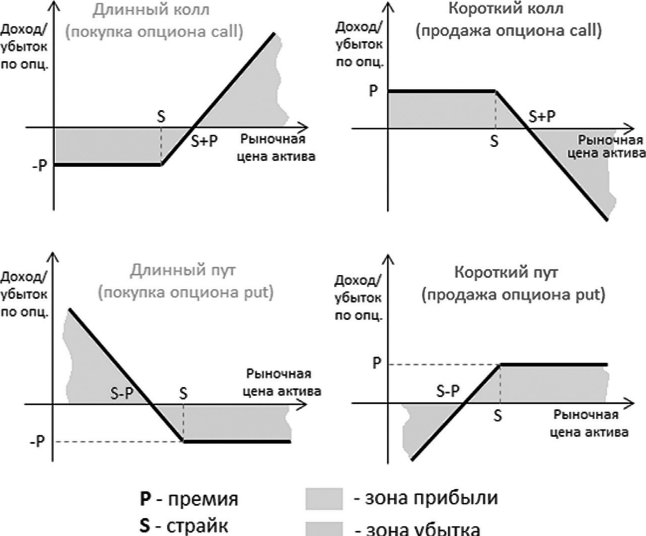

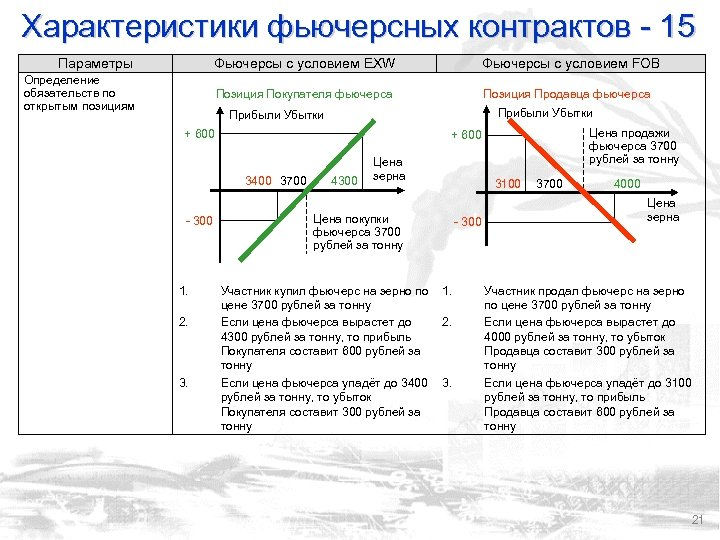

#Задание 2
---
Бизнесмен хочет расширить свое малое предприятие, заработав деньги на фондовом рынке, несмотря на риск. Он предполагает, что акции некоторой компании АБС имеют завышенную цену, которая упадет в течение полугода. Сегодня ее акция стоит 40 руб., а прогнозная цена бизнесмена – 25 руб. Что вы ему порекомендуете (подкрепите мнение расчетами)?
* Купить опцион покупателя европейского типа длительностью 6 месяцев с ценой
исполнения 35 руб.;
* купить фьючерс на акции с ценой исполнения 35 руб. со сроком исполнения полгода;
* купить опцион продавца европейского типа длительностью 6 месяцев с ценой
исполнения 35 руб.

---

## 1) Купить опцион покупателя европейского типа длительностью 6 месяцев с ценой исполнения 35 руб.
---

повторим некоторые параметры

In [12]:
sigma = 0.3 # Волатильность
r = 0.12 # Процентная ставка по кредиту
r0 = 0.06 # Безрисковая процентная ставка

In [13]:
S = 40 # текущая цена акции
ST = 25 # прогнозная цена акции
T = 6 / 12. # Премя до экспирации
E = 35 # Цена исполнения

In [14]:
C = BlackShowlsCall(0, T, E, S, r0, sigma)
print(f'Справедливая цена call-опциона = {C} рублей')

Справедливая цена call-опциона = 7.02 рублей


In [15]:
NewC = np.round(E + C, 2)
print(f'Цена акции, ниже которой бизнесмен будет нести убытки равна {NewC} рублей')

Цена акции, ниже которой бизнесмен будет нести убытки равна 42.02 рублей


При прогнозной цене акции = 25 рублей бизнесмен просто потеряет свои деньги в размере премии, то есть 7.02 рублей

## 2) купить фьючерс на акции с ценой исполнения 35 руб. со сроком исполнения полгода

---

In [16]:
F = E
print(f'Справедливая цена фьючерса равна {F} рублей')

Справедливая цена фьючерса равна 35 рублей


Учитывая, что происходит покупка фьючерса, то прибыль будет наблюдаться только если цена акции будет выше цены исполнения фьючерсного контракта, а так как прогнозированная цена равна 25 рублей - бизнесмен уйдет в минус на 35 рублей.

## 3) купить опцион продавца европейского типа длительностью 6 месяцев с ценой исполнения 35 руб.

---

In [17]:
P = BlackShowlsPut(0, T, E, S, r, sigma)
print(f'Справедливая цена put-опциона = {P} рублей')

Справедливая цена put-опциона = 0.75 рублей


Учитывая, что происходит покупка put-опциона, то бизнесмен начнет получать прибыль если цена акции будет меньше, чем E - P = 35 - 0.75 = 34.25 рублей. В результате бизнесмен получит прибыль равную 34.25 - 25 = 9.25 рублей

---
## Вывод
###Единственным хорошим решением является **ПОКУПКА PUT-ОПЦИОН**, остальные варианты приносят только потери. Эти высказывания верны, если через полгода цена акции действительно будет равна 25 рублям.
---

#Задание 3
---
Выпущены опционы покупателя и продавца европейского типа на одни и те же акции с одним и тем же сроком исполнения.
* Нарисуйте функцию выплаты и функцию возможной прибыли для опциона покупателя с точки зрения держателя опциона, если цена исполнения равна x руб., а сам опцион стоит y руб.
* Нарисуйте функцию выплаты и функцию возможной прибыли для опциона продавца с точки зрения держателя опциона, если цена исполнения равна x руб., а сам опцион стоит z руб.

---

## Часть 1
---

In [18]:
x = 40
y = 4
z = 12

In [19]:
sigma = 0.3 # Волатильность
r = 0.12 # Процентная ставка по кредиту
r0 = 0.06 # Безрисковая процентная ставка

Возьмем отрезок [0, 80] за интервал возможной цены базового актива. Некоторые значения их данного интервала взяты в качестве точек изгиба ломанной для последующих графиков

In [20]:
UA = np.array([0, 20, 40, 45, 55, 60, 80])
print(UA)

[ 0 20 40 45 55 60 80]


Далее введем функции, позволяющие получить 

In [21]:
def ProfitCall(Close, Strike):
  return np.array([np.max([C - Strike, 0]) for C in Close])

In [22]:
def ProfitPut(Close, Strike):
  return np.array([np.max([Strike - C, 0]) for C in Close])

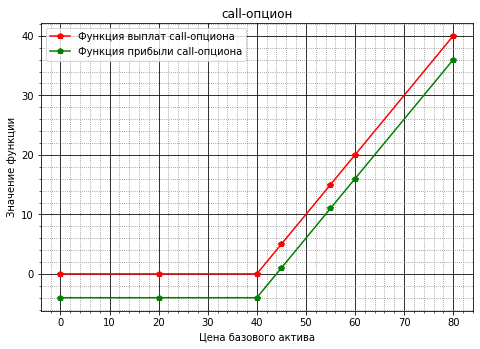

In [23]:
ua_range = UA
profit_call_range = ProfitCall(UA, x)
income_call_range = ProfitCall(UA, x) - y

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('call-опцион')
ax.plot(ua_range, profit_call_range, 'rp-', label='Функция выплат call-опциона')
ax.plot(ua_range, income_call_range, 'gp-' , label='Функция прибыли call-опциона')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

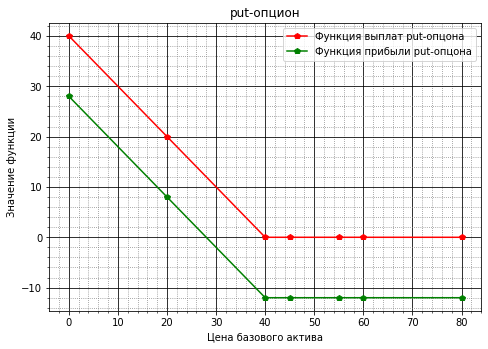

In [24]:
ua_range = UA
profit_put_range = ProfitPut(UA, x)
income_put_range = ProfitPut(UA, x) - z

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('put-опцион')
ax.plot(ua_range, profit_put_range, 'rp-', label='Функция выплат put-опцона')
ax.plot(ua_range, income_put_range, 'gp-' , label='Функция прибыли put-опцона')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

---
##1) Как изменится рисунок, если инвестор сразу купит по одному опциону покупателя и продавца («стрэддл»)?

---

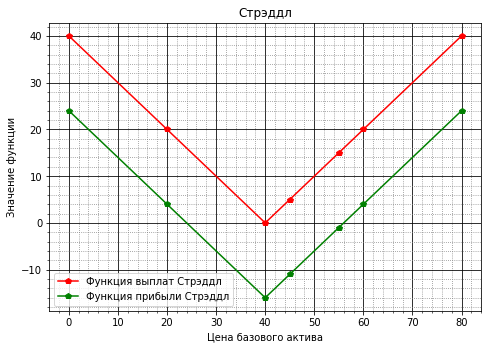

In [25]:
ua_range = UA
profit_straddle_range = profit_call_range + profit_put_range
income_straddle_range = income_call_range + income_put_range

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Стрэддл')
ax.plot(ua_range, profit_straddle_range, 'rp-', label='Функция выплат Стрэддл')
ax.plot(ua_range, income_straddle_range, 'gp-' , label='Функция прибыли Стрэддл')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

In [26]:
income_straddle_range

array([ 24,   4, -16, -11,  -1,   4,  24])

---
##2) Исходя из рисунка, какой вариант покупки (из трех) выгоднее?

---

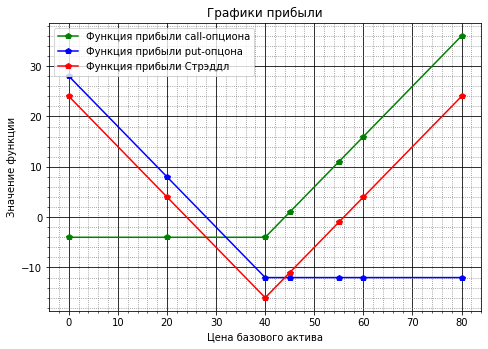

In [27]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Графики прибыли')
ax.plot(ua_range, income_call_range, 'gp-' , label='Функция прибыли call-опциона')
ax.plot(ua_range, income_put_range, 'bp-' , label='Функция прибыли put-опцона')
ax.plot(ua_range, income_straddle_range, 'rp-' , label='Функция прибыли Стрэддл')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

При большой волатильности на рынке наиболее выгодным является стратегия Стрэддл, так как при значительном изменении цены базового актива (не имеет значения в какую сторону) будет наблюдаться рост прибыли. В случае низкой волатильности менее рисковым является call-опцион

---
##3) Составим портфель («бычий спред»), купив опцион покупателя с ценой исполнения x руб. и стоимостью y руб., а также продав опцион покупателя с ценой исполнения 55 руб. и стоимостью 5 руб. Выгоднее ли этот портфель всех предыдущих вариантов (привести расчеты)?

---

покупка call-опциона

In [28]:
profit_buying_call_range = ProfitCall(UA, x)
income_buying_call_range = profit_buying_call_range - y

продажа call-опциона

In [29]:
profit_sale_call_range = - ProfitCall(UA, 55)
income_sale_call_range = profit_sale_call_range + 5

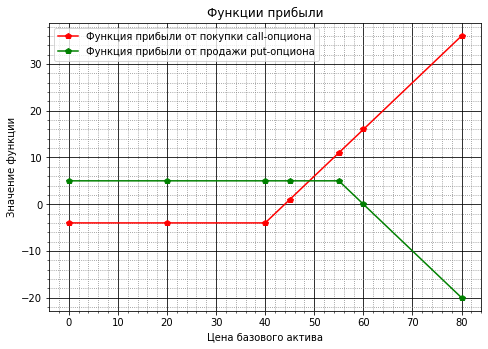

In [30]:
ua_range = UA

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Функции прибыли')
ax.plot(ua_range, income_buying_call_range, 'rp-', label='Функция прибыли от покупки call-опциона')
ax.plot(ua_range, income_sale_call_range, 'gp-' , label='Функция прибыли от продажи put-опциона')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

Бычий спред

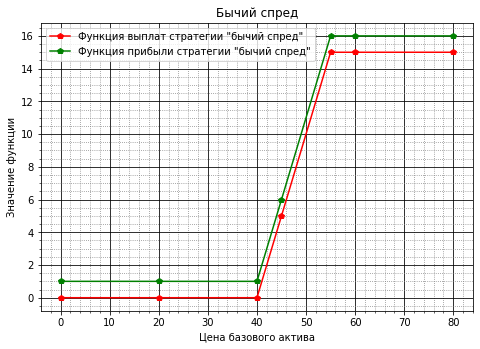

In [31]:
ua_range = UA
profit_BullSpread_range = profit_buying_call_range + profit_sale_call_range
income_BullSpread_range = income_buying_call_range + income_sale_call_range

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Бычий спред')
ax.plot(ua_range, profit_BullSpread_range, 'rp-', label='Функция выплат стратегии "бычий спред"')
ax.plot(ua_range, income_BullSpread_range, 'gp-' , label='Функция прибыли стратегии "бычий спред"')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

In [32]:
income_BullSpread_range

array([ 1,  1,  1,  6, 16, 16, 16])

Проанализируем все выше перечисленные стратегии

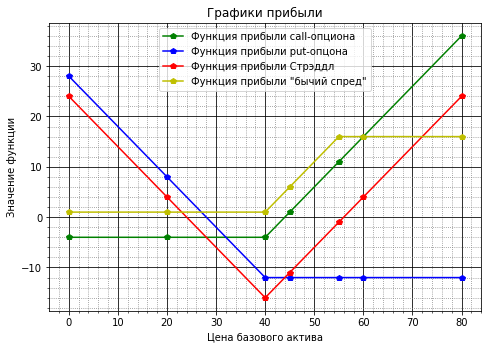

In [33]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Графики прибыли')
ax.plot(ua_range, income_call_range, 'gp-' , label='Функция прибыли call-опциона')
ax.plot(ua_range, income_put_range, 'bp-' , label='Функция прибыли put-опцона')
ax.plot(ua_range, income_straddle_range, 'rp-' , label='Функция прибыли Стрэддл')
ax.plot(ua_range, income_BullSpread_range, 'yp-' , label='Функция прибыли "бычий спред"')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

Как видим, стратегия "Бычий спред" исключает риски потери средств, таким образом данная стратегия является наиболее выгодной из всех вышеперечисленных.

---
##4) Составим портфель («бабочка»), купив опцион покупателя с ценой исполнения x руб. и стоимостью y руб., а также купив опцион покупателя с ценой исполнения 45 руб. и стоимостью 5 руб. Выгоднее ли этот портфель всех предыдущих вариантов (привести расчеты)?

---

In [34]:
UA = [0, 20, 40, 45, 55, 60, 80]

Покупка call-опциона с ценой исполнения x

In [35]:
profit_buying_call_range_1 = ProfitCall(UA, x)
income_buying_call_range_1 = profit_buying_call_range_1 - y

Покупка call-опциона с ценой исполнения 45 и стоимостью 5 руб

In [36]:
profit_buying_call_range_2 = ProfitCall(UA, 45)
income_buying_call_range_2 = profit_buying_call_range_2 - 5

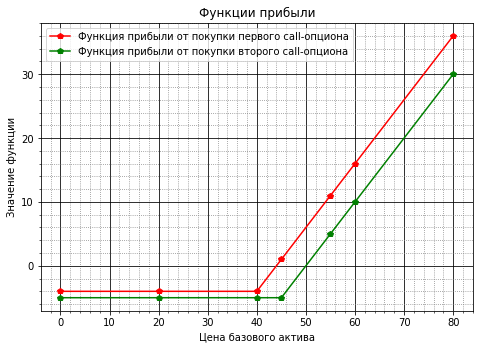

In [37]:
ua_range = UA

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Функции прибыли')
ax.plot(ua_range, income_buying_call_range_1, 'rp-', label='Функция прибыли от покупки первого call-опциона')
ax.plot(ua_range, income_buying_call_range_2, 'gp-' , label='Функция прибыли от покупки второго call-опциона')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

Бабочка

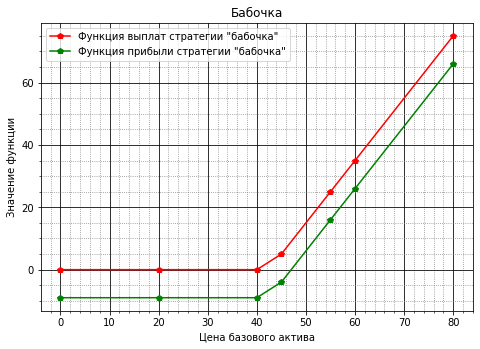

In [38]:
ua_range = UA
profit_butterfly_range = profit_buying_call_range_1 + profit_buying_call_range_2
income_butterfly_range = income_buying_call_range_1 + income_buying_call_range_2

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Бабочка')
ax.plot(ua_range, profit_butterfly_range, 'rp-', label='Функция выплат стратегии "бабочка"')
ax.plot(ua_range, income_butterfly_range, 'gp-' , label='Функция прибыли стратегии "бабочка"')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

Проанализируем все выше перечисленные стратегии

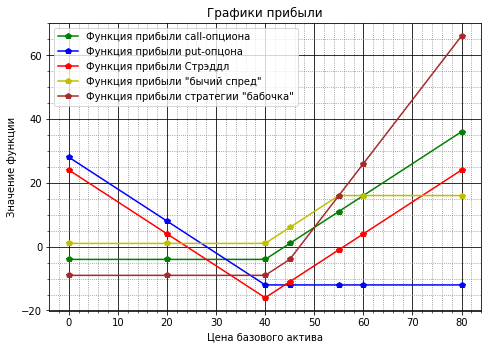

In [39]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Графики прибыли')
ax.plot(ua_range, income_call_range, 'gp-' , label='Функция прибыли call-опциона')
ax.plot(ua_range, income_put_range, 'bp-' , label='Функция прибыли put-опцона')
ax.plot(ua_range, income_straddle_range, 'rp-' , label='Функция прибыли Стрэддл')
ax.plot(ua_range, income_BullSpread_range, 'yp-' , label='Функция прибыли "бычий спред"')
ax.plot(ua_range, income_butterfly_range, color='brown', marker='p' , label='Функция прибыли стратегии "бабочка"')

plt.xlabel('Цена базового актива')
plt.ylabel('Значение функции')

ax.legend()

plt.show()

Как видим стратегия бабочка является выгодной только при большом росте цены базового актива. Поэтому лучшей стратегией считаю стратегию "бычий спред", которая не приносит потерь.

#Задание 4
---
Текущая цена акции равна 100 руб., а цена исполнения опциона покупателя европейского
типа равна 110 руб. со сроком исполнения один год (T=1). Пусть безрисковая процентная
ставка r=0,1, волатильность равна 0,3. Найдите
* Хеджирующее соотношение Δ для опциона покупателя.
* Текущую цену (в момент t) опциона покупателя.
* Цену опциона покупателя спустя полгода с момента его выпуска.

Как увеличение срока исполнения в два раза влияет на текущую цену опциона покупателя?
Используя соотношение call-put, найдите текущую цену опциона продавца европейского
типа со сроком исполнения один год (T=1) и ценой исполнения 90 руб.

---

In [40]:
S = 100 # текущая цена акции
E = 110 # цнеа исполнения put-опциона европейского типа
r = 0.1 # безрисковая процентная ставка
sigma = 0.3 # волатильность
T = 1 # срок исполнения

## Хеджирующее соотношение Δ для опциона покупателя.

In [41]:
d1 = (np.log(S / E) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
Δ = np.round(sts.norm().cdf(d1), 2)
print(f'Коэффициент дельта-хеджирования Δ = {Δ}')

Коэффициент дельта-хеджирования Δ = 0.57


##Текущую цену (в момент t) опциона покупателя.

In [42]:
t_range = np.arange(0, T, 0.02)
C_range = np.array([BlackShowlsCall(t, T, E, S, r, sigma) for t in t_range])

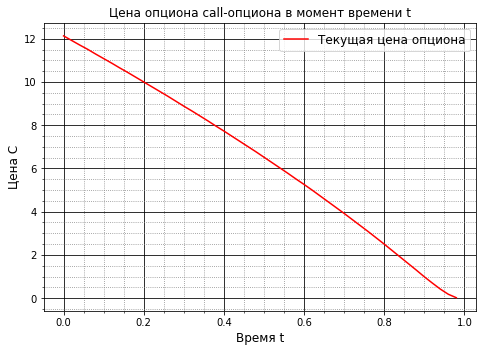

In [43]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')

plt.title('Цена опциона call-опциона в момент времени t')
ax.plot(t_range, C_range, 'r-' , label='Текущая цена опциона')

plt.xlabel('Время t', size=12)
plt.ylabel('Цена C', size=12)

ax.legend(loc=1, prop={'size': 12})

plt.show()

Цена опциона в момент времени t=0

In [44]:
C = BlackShowlsCall(0, T, E, S, r, sigma)
print(C)

12.13


## Цену опциона покупателя спустя полгода с момента его выпуска.

In [45]:
print(f'Цена call-опциона через пол года равна {BlackShowlsCall(0.5, T, E, S, r, sigma)} руб.')

Цена call-опциона через пол года равна 6.52 руб.


## Как увеличение срока исполнения в два раза влияет на текущую цену опциона покупателя?

In [46]:
BlackShowlsCall(0, 2 * T, E, S, r, sigma)

21.41

Увеличение срока исполнения в два раза увеличило текущую цену опциона почти тоже в 2 раза.

## Используя соотношение call-put, найдите текущую цену опциона продавца европейского типа со сроком исполнения один год (T=1) и ценой исполнения 90 руб.  


In [54]:
P = BlackShowlsPut(0, T, 90, S, r, sigma)
print(f'Текущая цена put-опциона со сроком исполнения и ценой исполнения равна {P} руб.')

Текущая цена put-опциона со сроком исполнения и ценой исполнения равна 1.91 руб.


#Задание 5
---
* Пусть безрисковая процентная ставка r=0,2. Пусть текущая цена базового актива составляет
200 руб., а волатильность σ=0,3 (или, что то же самое, 30%) в год. Используя формулу Блэка
– Шоулса, найдите цену опциона покупателя с исполнением через T=4 года, если цена
исполнения E составит 220 руб. Пользуясь соотношением call-put, вычислите цену опциона
продавца с исполнением через T=4 года, если цена исполнения E составит 180 руб.

* Как изменятся цены этих опционов, если волатильность повысится до σ=0,4? Приведите
результаты расчетов. Сравните их с полученными ранее.

* Как изменятся цены этих опционов, если при волатильности σ=0,5 цены исполнения составят
230 руб. для опциона покупателя и 170 руб. для опциона продавца? Они повысятся?

---

## Часть 1

In [55]:
r = 0.2
S = 200
sigma = 0.3
E1 = 220
E2 = 180
T = 4

Воспользуемся функцией, определенной выше

In [56]:
C1 = BlackShowlsCall(0, T, E1, S, r, sigma)
P1 = BlackShowlsPut(0, T, E2, S, r, sigma)
print(f'Будущая цена call-опциона через 4 года равна {C1} руб.')
print(f'Будущая цена put-опциона через 4 года равна {P1} руб.')

Будущая цена call-опциона через 4 года равна 105.99 руб.
Будущая цена put-опциона через 4 года равна 2.12 руб.


Увеличим волатильность до 0.4

In [57]:
sigma = 0.4
C2 = BlackShowlsCall(0, T, E1, S, r, sigma)
P2 = BlackShowlsPut(0, T, E2, S, r, sigma)
print(f'Будущая цена call-опциона через 4 года равна {C2} руб.')
print(f'Будущая цена put-опциона через 4 года равна {P2} руб.')

Будущая цена call-опциона через 4 года равна 112.29 руб.
Будущая цена put-опциона через 4 года равна 6.22 руб.


In [58]:
print(f'Цена call-опциона увеличилась на {np.round(C2 - C1, 2)} руб.')
print(f'Цена put-опциона увеличилась на {np.round(P2 - P1, 2)} руб.')

Цена call-опциона увеличилась на 6.3 руб.
Цена put-опциона увеличилась на 4.1 руб.


In [59]:
sigma = 0.5
E12 = 230
E22 = 170
C3 = BlackShowlsCall(0, T, E12, S, r, sigma)
P3 = BlackShowlsPut(0, T, E22, S, r, sigma)
print(f'Будущая цена call-опциона через 4 года равна {C3} руб.')
print(f'Будущая цена put-опциона через 4 года равна {P3} руб.')

Будущая цена call-опциона через 4 года равна 117.15 руб.
Будущая цена put-опциона через 4 года равна 10.23 руб.


In [60]:
print(f'Цена call-опциона увеличилась на {np.round(C3 - C1, 2)} руб.')
print(f'Цена put-опциона увеличилась на {np.round(P3 - P1, 2)} руб.')

Цена call-опциона увеличилась на 11.16 руб.
Цена put-опциона увеличилась на 8.11 руб.
